Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 60s 1ms/step - loss: 0.3493 - acc: 0.8944 - val_loss: 0.1128 - val_acc: 0.9658
Epoch 2/5
48000/48000 [==============================] - 60s 1ms/step - loss: 0.1383 - acc: 0.9590 - val_loss: 0.0729 - val_acc: 0.9807
Epoch 3/5
48000/48000 [==============================] - 58s 1ms/step - loss: 0.1033 - acc: 0.9691 - val_loss: 0.0651 - val_acc: 0.9812
Epoch 4/5
48000/48000 [==============================] - 56s 1ms/step - loss: 0.0856 - acc: 0.9748 - val_loss: 0.0578 - val_acc: 0.9839
Epoch 5/5
10000/10000 [==============================] - 4s 425us/step
Test loss: 0.051437360096443445
Test acc: 0.9824


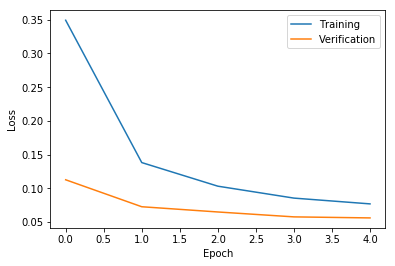

[0.8944375, 0.959, 0.969125, 0.9748125, 0.9768333333333333]


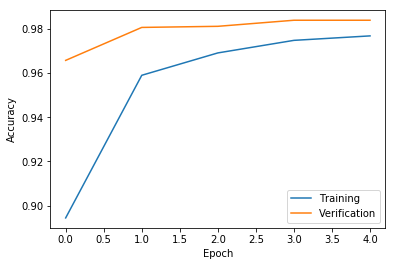

In [8]:
import keras
import matplotlib.pyplot as plt
from keras import datasets
from keras import models, layers
from keras import backend

class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        self.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
        self.add(layers.MaxPooling2D(pool_size=(2,2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128,activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))
        self.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


class DATA():
    def __init__(self):
        num_classes = 10
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1], x_train.shape[2]
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
            x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
            input_shape = (1,img_rows, img_cols,1)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)
        x_train = x_train.astype('float32') / 255
        x_test = x_test.astype('float32') / 255
        y_train = keras.utils.to_categorical(y_train,num_classes)
        y_test = keras.utils.to_categorical(y_test,num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    print(history['acc'])
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()
def main():
    batch_size = 128
    epochs = 5
    data = DATA()
    model = CNN(data.input_shape,data.num_classes)
    history=model.fit(data.x_train,data.y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2)
    score = model.evaluate(data.x_test,data.y_test)
    print('Test loss:', score[0])
    print('Test acc:', score[1])
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
if __name__ == '__main__':
    main()